<a href="https://colab.research.google.com/github/livingMabhijit/MyDevops/blob/master/Saket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install download

In [4]:
from download import download
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip','/tmp/aq',kind = 'zip')


Creating data folder...

file_sizes: 100%|██████████████████████████| 7.96M/7.96M [00:00<00:00, 12.2MB/s]
Extracting zip file...
Successfully downloaded / unzipped to /tmp/aq


In [5]:
from __future__ import absolute_import,division, print_function,unicode_literals
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
 

In [7]:
df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [17]:
def convert_to_date(a):
  return datetime.strptime(a,'%Y %m %d %H')


In [21]:
aq_df = pd.read_csv('/tmp/aq/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',parse_dates=[['year','month','day','hour']],date_parser=convert_to_date,keep_date_col=True)
aq_df

,year_month_day_hour,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017-02-28 19:00:00,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,2017-02-28 20:00:00,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,2017-02-28 21:00:00,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,2017-02-28 22:00:00,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [22]:
aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   year_month_day_hour  35064 non-null  datetime64[ns]
 1   No                   35064 non-null  int64         
 2   year                 35064 non-null  object        
 3   month                35064 non-null  object        
 4   day                  35064 non-null  object        
 5   hour                 35064 non-null  object        
 6   PM2.5                34285 non-null  float64       
 7   PM10                 34408 non-null  float64       
 8   SO2                  34334 non-null  float64       
 9   NO2                  33830 non-null  float64       
 10  CO                   33052 non-null  float64       
 11  O3                   33850 non-null  float64       
 12  TEMP                 35011 non-null  float64       
 13  PRES                 35014 non-

In [31]:
print('rows = ',aq_df.shape[0])
print('columns = ', aq_df.shape[1])
print('Features = ', aq_df.columns.to_list())
print('null_value = ', aq_df.isnull().any())
print('unique_value = ', aq_df.nunique())

rows =  35064
columns =  19
Features =  ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
null_value =  year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool
unique_value =  year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5                    486
PM

In [32]:
aq_df.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [33]:
  aq_df_nonindexed = aq_df.copy()

In [34]:
aq_df = aq_df.set_index('year_month_day_hour')
aq_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [35]:
aq_df.loc['2013':'2015']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01 01:00:00,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2013-03-01 02:00:00,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
2013-03-01 03:00:00,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
2013-03-01 04:00:00,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,24860,2015,12,31,19,85.0,95.0,12.0,73.0,1200.0,2.0,-0.6,1021.0,-9.5,0.0,NE,0.6,Dingling
2015-12-31 20:00:00,24861,2015,12,31,20,NaN,109.0,32.0,79.0,2900.0,2.0,-1.8,1021.2,-9.9,0.0,NW,1.1,Dingling
2015-12-31 21:00:00,24862,2015,12,31,21,80.0,100.0,35.0,81.0,3200.0,2.0,-1.6,1020.8,-9.7,0.0,NE,0.9,Dingling


In [38]:
aq_df['PM2.5'].head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

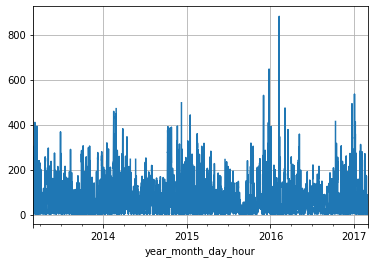

In [39]:
aq_df['PM2.5'].plot(grid = True)

In [52]:
# pm25_2015 = aq_df.loc['2015']['PM2.5']
# pm25_2015.plot(grid = True)

In [50]:
# x = ['2014','2015','2016','2017']
def pm25_2015(x):
  pm_year = aq_df.loc[x]['PM2.5']
  plot_year = pm_year.plot(grid= True)
  return plot_year

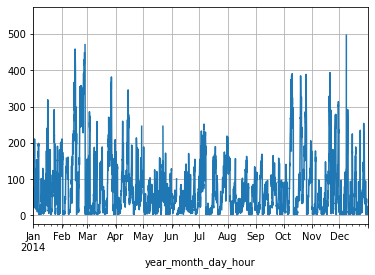

In [56]:
pm25_2015('2014')

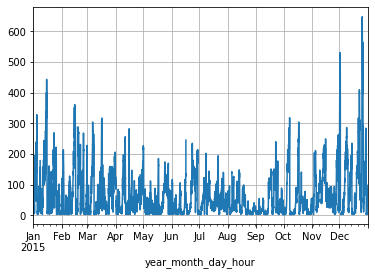

In [53]:
pm25_2015('2015')

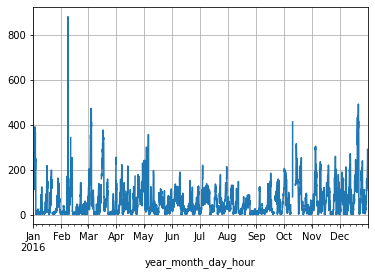

In [57]:
pm25_2015('2016')

In [62]:
import plotly.express as px
fig = px.line(aq_df,x =aq_df.index,y = 'PM2.5')
fig.update_xaxes(rangeslider_visible = True)
fig.show()

In [61]:
aq_df.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [7]:
import pandas as pd
df = pd.read_excel('/content/drive/My Drive/datasets/Dummy Raw Data ARR.xlsx')
df

,Incident ID,Service type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC Response Time,Last Resolved Date,SLA Hold Time,SLA completion Time
0,INC1,abc,xyz,Critical,Assigned,ACS admin,Ram,CTS,Akbar,TSIntegration,2020-01-10 00:10:00,2020-01-10 00:10:00,2020-01-10 12:07:00,2020-01-10 12:07:00,2020-01-10 13:49:00,NaN,00 13:39:14
1,INC2,abc,xyz,High,Cancelled,Billing,Shyam,DCNOC,TrueSight,TSIntegration,2020-01-10 00:11:00,2020-01-10 00:11:00,2020-01-10 00:54:00,2020-01-10 00:12:00,2020-01-10 00:54:00,NaN,00 00:43:33
2,INC3,abc,xyz,Medium,Closed,Backup Team,Mohan,EDH admin,TrueSight,TSIntegration,2020-01-10 00:12:00,2020-01-10 00:12:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:32:00,NaN,00 00:19:34
3,INC4,abc,xyz,Low,In Progess,CDF Admin,Sohan,DCNOC,TrueSight,TSIntegration,2020-01-10 00:07:00,2020-01-10 00:07:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:39:00,NaN,00 00:32:03
4,INC5,abc,xyz,Critical,Pending,Windows Admin,Geeta,DCNOC,TrueSight,TSIntegration,2020-01-10 00:04:00,2020-01-10 00:04:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 09:26:00,NaN,00 09:22:11
5,INC6,abc,xyz,High,Resolved,Unix Team,Ram,DCNOC,TrueSight,TSIntegration,2020-01-10 00:10:00,2020-01-10 00:10:00,2020-01-10 12:07:00,2020-01-10 12:07:00,2020-01-10 13:49:00,NaN,00 13:39:14
6,INC7,abc,xyz,Medium,Assigned,ACS admin,Shyam,EDH admin,TrueSight,TSIntegration,2020-01-10 00:11:00,2020-01-10 00:11:00,2020-01-10 00:54:00,2020-01-10 00:12:00,2020-01-10 00:54:00,NaN,00 00:43:33
7,INC8,abc,xyz,Low,Cancelled,Billing,Mohan,BOST,TrueSight,TSIntegration,2020-01-10 00:12:00,2020-01-10 00:12:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:32:00,NaN,00 00:19:34
8,INC9,abc,xyz,Critical,Closed,Backup Team,Sohan,CRM,TrueSight,TSIntegration,2020-01-10 00:07:00,2020-01-10 00:07:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:39:00,NaN,00 00:32:03
9,INC10,abc,xyz,High,In Progess,CDF Admin,Geeta,Windows,TrueSight,TSIntegration,2020-01-10 00:04:00,2020-01-10 00:04:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 09:26:00,NaN,00 09:22:11


In [8]:
df_new=df.copy()
df_new.head()

,Incident ID,Service type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC Response Time,Last Resolved Date,SLA Hold Time,SLA completion Time
0,INC1,abc,xyz,Critical,Assigned,ACS admin,Ram,CTS,Akbar,TSIntegration,2020-01-10 00:10:00,2020-01-10 00:10:00,2020-01-10 12:07:00,2020-01-10 12:07:00,2020-01-10 13:49:00,NaN,00 13:39:14
1,INC2,abc,xyz,High,Cancelled,Billing,Shyam,DCNOC,TrueSight,TSIntegration,2020-01-10 00:11:00,2020-01-10 00:11:00,2020-01-10 00:54:00,2020-01-10 00:12:00,2020-01-10 00:54:00,NaN,00 00:43:33
2,INC3,abc,xyz,Medium,Closed,Backup Team,Mohan,EDH admin,TrueSight,TSIntegration,2020-01-10 00:12:00,2020-01-10 00:12:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:32:00,NaN,00 00:19:34
3,INC4,abc,xyz,Low,In Progess,CDF Admin,Sohan,DCNOC,TrueSight,TSIntegration,2020-01-10 00:07:00,2020-01-10 00:07:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:39:00,NaN,00 00:32:03
4,INC5,abc,xyz,Critical,Pending,Windows Admin,Geeta,DCNOC,TrueSight,TSIntegration,2020-01-10 00:04:00,2020-01-10 00:04:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 09:26:00,NaN,00 09:22:11


In [4]:
df1= df[df['Status']=='Closed']
df1

,Incident ID,Service type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC Response Time,Last Resolved Date,SLA Hold Time,SLA completion Time
2,INC3,abc,xyz,Medium,Closed,Backup Team,Mohan,EDH admin,TrueSight,TSIntegration,2020-01-10 00:12:00,2020-01-10 00:12:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:32:00,NaN,00 00:19:34
8,INC9,abc,xyz,Critical,Closed,Backup Team,Sohan,CRM,TrueSight,TSIntegration,2020-01-10 00:07:00,2020-01-10 00:07:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:39:00,NaN,00 00:32:03
14,INC15,abc,xyz,Medium,Closed,Backup Team,Geeta,DCNOC,TrueSight,8006161,2020-01-10 00:04:00,2020-01-10 00:04:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 09:26:00,NaN,00 09:22:11
18,INC19,abc,xyz,Medium,Closed,Unix Team,Sohan,CRM,TrueSight,TSIntegration,2020-01-10 00:07:00,2020-01-10 00:07:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:39:00,NaN,00 00:32:03


In [7]:
df2 = df[(df['Submitter']=='TSIntegration')& (df['Group']=='DCNOC')]
df2

,Incident ID,Service type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC Response Time,Last Resolved Date,SLA Hold Time,SLA completion Time
1,INC2,abc,xyz,High,Cancelled,Billing,Shyam,DCNOC,TrueSight,TSIntegration,2020-01-10 00:11:00,2020-01-10 00:11:00,2020-01-10 00:54:00,2020-01-10 00:12:00,2020-01-10 00:54:00,NaN,00 00:43:33
3,INC4,abc,xyz,Low,In Progess,CDF Admin,Sohan,DCNOC,TrueSight,TSIntegration,2020-01-10 00:07:00,2020-01-10 00:07:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:39:00,NaN,00 00:32:03
4,INC5,abc,xyz,Critical,Pending,Windows Admin,Geeta,DCNOC,TrueSight,TSIntegration,2020-01-10 00:04:00,2020-01-10 00:04:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 09:26:00,NaN,00 09:22:11
5,INC6,abc,xyz,High,Resolved,Unix Team,Ram,DCNOC,TrueSight,TSIntegration,2020-01-10 00:10:00,2020-01-10 00:10:00,2020-01-10 12:07:00,2020-01-10 12:07:00,2020-01-10 13:49:00,NaN,00 13:39:14
11,INC12,abc,xyz,Low,Resolved,Unix Team,Shyam,DCNOC,TrueSight,TSIntegration,2020-01-10 00:11:00,2020-01-10 00:11:00,2020-01-10 00:54:00,2020-01-10 00:12:00,2020-01-10 00:54:00,NaN,00 00:43:33
15,INC16,abc,xyz,Low,In Progess,CDF Admin,Ram,DCNOC,Akbar,TSIntegration,2020-01-10 00:10:00,2020-01-10 00:10:00,2020-01-10 12:07:00,2020-01-10 12:07:00,2020-01-10 13:49:00,NaN,00 13:39:14


In [5]:
df3 = df.query('Priority != "Low" ')
df3

NameError: ignored

In [17]:
df4 = df.loc[(df.Status == "Closed") & (df.Assignee == "Sohan")]
df4

,Incident ID,Service type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC Response Time,Last Resolved Date,SLA Hold Time,SLA completion Time


In [18]:
df5 = df[df.Assignee.isin(['Geeta','Mohan'])]
df5

,Incident ID,Service type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC Response Time,Last Resolved Date,SLA Hold Time,SLA completion Time
2,INC3,abc,xyz,Medium,Closed,Backup Team,Mohan,EDH admin,TrueSight,TSIntegration,2020-01-10 00:12:00,2020-01-10 00:12:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:32:00,NaN,00 00:19:34
4,INC5,abc,xyz,Critical,Pending,Windows Admin,Geeta,DCNOC,TrueSight,TSIntegration,2020-01-10 00:04:00,2020-01-10 00:04:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 09:26:00,NaN,00 09:22:11
7,INC8,abc,xyz,Low,Cancelled,Billing,Mohan,BOST,TrueSight,TSIntegration,2020-01-10 00:12:00,2020-01-10 00:12:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:32:00,NaN,00 00:19:34
9,INC10,abc,xyz,High,In Progess,CDF Admin,Geeta,Windows,TrueSight,TSIntegration,2020-01-10 00:04:00,2020-01-10 00:04:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 09:26:00,NaN,00 09:22:11
12,INC13,abc,xyz,Critical,Assigned,ACS admin,Mohan,EDH admin,TrueSight,TSIntegration,2020-01-10 00:12:00,2020-01-10 00:12:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:32:00,NaN,00 00:19:34
14,INC15,abc,xyz,Medium,Closed,Backup Team,Geeta,DCNOC,TrueSight,8006161,2020-01-10 00:04:00,2020-01-10 00:04:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 09:26:00,NaN,00 09:22:11
17,INC18,abc,xyz,High,Resolved,Unix Team,Mohan,BOST,TrueSight,TSIntegration,2020-01-10 00:12:00,2020-01-10 00:12:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:32:00,NaN,00 00:19:34


In [21]:
df6 = df.groupby('Assignee')
df6.first()

,Incident ID,Service type,Summary,Priority,Status,Assigned Group,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC Response Time,Last Resolved Date,SLA Hold Time,SLA completion Time
Assignee,,,,,,,,,,,,,,,,
Geeta,INC5,abc,xyz,Critical,Pending,Windows Admin,DCNOC,TrueSight,TSIntegration,2020-01-10 00:04:00,2020-01-10 00:04:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 09:26:00,NaN,00 09:22:11
Mohan,INC3,abc,xyz,Medium,Closed,Backup Team,EDH admin,TrueSight,TSIntegration,2020-01-10 00:12:00,2020-01-10 00:12:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:32:00,NaN,00 00:19:34
Ram,INC1,abc,xyz,Critical,Assigned,ACS admin,CTS,Akbar,TSIntegration,2020-01-10 00:10:00,2020-01-10 00:10:00,2020-01-10 12:07:00,2020-01-10 12:07:00,2020-01-10 13:49:00,NaN,00 13:39:14
Shyam,INC2,abc,xyz,High,Cancelled,Billing,DCNOC,TrueSight,TSIntegration,2020-01-10 00:11:00,2020-01-10 00:11:00,2020-01-10 00:54:00,2020-01-10 00:12:00,2020-01-10 00:54:00,NaN,00 00:43:33
Sohan,INC4,abc,xyz,Low,In Progess,CDF Admin,DCNOC,TrueSight,TSIntegration,2020-01-10 00:07:00,2020-01-10 00:07:00,2020-01-10 00:18:00,2020-01-10 00:18:00,2020-01-10 00:39:00,NaN,00 00:32:03


In [23]:
df7 = df.groupby(['Assignee','Submitter'])
df7.first()

Incident ID  ... SLA completion Time
Assignee Submitter                  ...                    
Geeta    8006161             INC15  ...         00 09:22:11
         TSIntegration        INC5  ...         00 09:22:11
Mohan    TSIntegration        INC3  ...         00 00:19:34
Ram      TSIntegration        INC1  ...         00 13:39:14
Shyam    TSIntegration        INC2  ...         00 00:43:33
Sohan    8006161             INC14  ...         00 00:32:03
         TSIntegration        INC4  ...         00 00:32:03

[7 rows x 15 columns]

In [20]:
# a = [1,2,3,4,5,6]
# type(pd.DataFrame(a))

In [108]:
import pandas as pd
dt = pd.read_excel('/content/drive/My Drive/datasets/Actual Response Report dump -Fazil- Oct 15 2020 (1).xlsx')
dt.head(5)

,Incident ID,Service Type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC.Response Time,Last Resolved Date,Accumulated SLAHOLD Time (sec),SLA Completion Time
0,INC000008171285,User Service Restoration,Redemption issue 966549902270 // 1-237463145471,Low,Closed,BSS-BO,AakifNazir Imam,CTS,MishalAl Shammary,m.shammary,2020-10-01 00:10:14,2020-10-01 00:10:14,2020-10-01 12:07:41,2020-10-01 12:07:41,2020-10-01 13:49:28,NaN,00 13:39:14
1,INC000008171288,Infrastructure Event,Queue eecsaruh6hoa117_EAIAX1007P_FLOWAUDITING!...,Low,Closed,MB Admin,NaN,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:11:16,2020-10-01 00:11:16,2020-10-01 00:54:49,2020-10-01 00:12:00,2020-10-01 00:54:49,NaN,00 00:43:33
2,INC000008171289,Infrastructure Event,CPU Utilization is 99% on mprl334,Low,Closed,Unix Team,Mohan Subramani,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:12:32,2020-10-01 00:12:32,2020-10-01 00:18:41,2020-10-01 00:18:41,2020-10-01 00:32:06,NaN,00 00:19:34
3,INC000008171539,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:07:13,2020-10-01 00:07:13,2020-10-01 00:18:01,2020-10-01 00:18:01,2020-10-01 00:39:16,NaN,00 00:32:03
4,INC000008171540,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:04:33,2020-10-01 00:04:33,2020-10-01 00:18:00,2020-10-01 00:18:00,2020-10-01 09:26:44,NaN,00 09:22:11


In [111]:
# columns = ['Reported Date','Submit Date','Actual Start','INC.Response Time','Last Resolved Date']
# for col in columns:
#   dt[col]=pd.to_datetime(dt[col])
# Actual response time
dt['Actual response time'] = dt['Actual Start']-dt['Reported Date']
dt['Actual response time in seconds']= dt['Actual response time'].dt.total_seconds()
#Actual response time in seconds
dt['Actual response time'] = pd.to_datetime(dt["Actual response time in seconds"], unit='s').dt.strftime("%H:%M:%S")
# week number
dt['Week_Number'] = dt['Submit Date'].dt.isocalendar().week
# tool response time
dt['Tool response time'] = dt['INC.Response Time']-dt['Reported Date']
#Tool response time in seconds
dt['Tool response time in seconds'] = dt['Tool response time'].dt.total_seconds()
dt['Tool response time'] = pd.to_datetime(dt["Tool response time in seconds"], unit='s').dt.strftime("%H:%M:%S")

dt.head(5)

,Incident ID,Service Type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC.Response Time,Last Resolved Date,Accumulated SLAHOLD Time (sec),SLA Completion Time,Actual response time,Actual response time in seconds,Week_Number,Tool response time,Tool response time in seconds
0,INC000008171285,User Service Restoration,Redemption issue 966549902270 // 1-237463145471,Low,Closed,BSS-BO,AakifNazir Imam,CTS,MishalAl Shammary,m.shammary,2020-10-01 00:10:14,2020-10-01 00:10:14,2020-10-01 12:07:41,2020-10-01 12:07:41,2020-10-01 13:49:28,NaN,00 13:39:14,11:57:27,43047.0,40,11:57:27,43047.0
1,INC000008171288,Infrastructure Event,Queue eecsaruh6hoa117_EAIAX1007P_FLOWAUDITING!...,Low,Closed,MB Admin,NaN,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:11:16,2020-10-01 00:11:16,2020-10-01 00:54:49,2020-10-01 00:12:00,2020-10-01 00:54:49,NaN,00 00:43:33,00:43:33,2613.0,40,00:00:44,44.0
2,INC000008171289,Infrastructure Event,CPU Utilization is 99% on mprl334,Low,Closed,Unix Team,Mohan Subramani,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:12:32,2020-10-01 00:12:32,2020-10-01 00:18:41,2020-10-01 00:18:41,2020-10-01 00:32:06,NaN,00 00:19:34,00:06:09,369.0,40,00:06:09,369.0
3,INC000008171539,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:07:13,2020-10-01 00:07:13,2020-10-01 00:18:01,2020-10-01 00:18:01,2020-10-01 00:39:16,NaN,00 00:32:03,00:10:48,648.0,40,00:10:48,648.0
4,INC000008171540,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:04:33,2020-10-01 00:04:33,2020-10-01 00:18:00,2020-10-01 00:18:00,2020-10-01 09:26:44,NaN,00 09:22:11,00:13:27,807.0,40,00:13:27,807.0


In [112]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7354 entries, 0 to 7353
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Incident ID                      7354 non-null   object        
 1   Service Type                     7354 non-null   object        
 2   Summary                          7354 non-null   object        
 3   Priority                         7354 non-null   object        
 4   Status                           7354 non-null   object        
 5   Assigned Group                   7354 non-null   object        
 6   Assignee                         5434 non-null   object        
 7   Group                            7354 non-null   object        
 8   Owner Name                       7354 non-null   object        
 9   Submitter                        7354 non-null   object        
 10  Reported Date                    7354 non-null   datetime64[

In [27]:
# incident counts
dt.groupby(dt['Assigned Group']).count()[['Incident ID']].sum()


Incident ID    7354
dtype: int64

In [157]:
#Average response time total
y = dt.groupby(dt['Assigned Group']).mean()[['Actual response time in seconds']]/


Actual response time in seconds    17364.63113
dtype: float64

In [120]:
a = dt.groupby(dt['Assigned Group']).count()[['Incident ID']]
a.rename(columns = {'Incident ID':'Incident Counts'}, inplace = True) 
a

,Incident Counts
Assigned Group,
ACS Admin,48
ASCADE Operations,3
ASCADE_ADMIN,33
Automation Scheduling Team,1
BI_L2,17
...,...
USSD,1
Unix Team,829
WAS Admin,119


In [34]:
# dt.groupby(dt['Assigned Group']).count()[['Actual response time']]

In [118]:
 x=dt.groupby(dt['Assigned Group']).mean()[['Actual response time in seconds']]
 x.head(5)

,Actual response time in seconds
Assigned Group,
ACS Admin,2966.708333
ASCADE Operations,1035.500000
ASCADE_ADMIN,814.281250
Automation Scheduling Team,81221.000000
BI_L2,2098.647059


In [105]:
a['Average actual response time'] = pd.to_datetime(x["Actual response time in seconds"], unit='s').dt.strftime("%H:%M:%S")
a.head(20)

,Incedent Counts,Average actual response time
Assigned Group,,
ACS Admin,48,00:49:26
ASCADE Operations,3,00:17:15
ASCADE_ADMIN,33,00:13:34
Automation Scheduling Team,1,22:33:41
BI_L2,17,00:34:58
BSS-BO,393,08:18:18
BSS-CC,7,03:03:20
BSS-Payment,18,05:48:20
Backup Team,112,00:14:24


In [107]:
print(a)

                            Incedent Counts Average actual response time
Assigned Group                                                          
ACS Admin                                48                     00:49:26
ASCADE Operations                         3                     00:17:15
ASCADE_ADMIN                             33                     00:13:34
Automation Scheduling Team                1                     22:33:41
BI_L2                                    17                     00:34:58
...                                     ...                          ...
USSD                                      1                     00:12:18
Unix Team                               829                     00:07:24
WAS Admin                               119                     00:29:51
WFM Admin                                14                     00:03:24
Windows Admins                          660                     00:09:32

[67 rows x 2 columns]


In [122]:
dt['Actual response time in seconds']

0       43047.0
1        2613.0
2         369.0
3         648.0
4         807.0
         ...   
7349      365.0
7350      300.0
7351      225.0
7352      125.0
7353     1200.0
Name: Actual response time in seconds, Length: 7354, dtype: float64

In [ ]:
# if dt['Priority']=='Low':
#   if dt['Actual response time in seconds']>=600:

#     dt['result'] = 'Breached'
#   else:
#     dt['result'] = 'Met'
# (df['a'] >= 20) & (df['b'] >= 20)

In [146]:
# Critical priority
dt['result'] = (dt['Actual response time in seconds']<600) & (dt['Priority']== 'Critical')
dt['result'] = dt['result'].astype(object).replace({False: 'Breached', True: 'Met'})
dt.head(5)

,Incident ID,Service Type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC.Response Time,Last Resolved Date,Accumulated SLAHOLD Time (sec),SLA Completion Time,Actual response time,Actual response time in seconds,Week_Number,Tool response time,Tool response time in seconds,result
0,INC000008171285,User Service Restoration,Redemption issue 966549902270 // 1-237463145471,Low,Closed,BSS-BO,AakifNazir Imam,CTS,MishalAl Shammary,m.shammary,2020-10-01 00:10:14,2020-10-01 00:10:14,2020-10-01 12:07:41,2020-10-01 12:07:41,2020-10-01 13:49:28,NaN,00 13:39:14,11:57:27,43047.0,40,11:57:27,43047.0,Breached
1,INC000008171288,Infrastructure Event,Queue eecsaruh6hoa117_EAIAX1007P_FLOWAUDITING!...,Low,Closed,MB Admin,NaN,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:11:16,2020-10-01 00:11:16,2020-10-01 00:54:49,2020-10-01 00:12:00,2020-10-01 00:54:49,NaN,00 00:43:33,00:43:33,2613.0,40,00:00:44,44.0,Breached
2,INC000008171289,Infrastructure Event,CPU Utilization is 99% on mprl334,Low,Closed,Unix Team,Mohan Subramani,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:12:32,2020-10-01 00:12:32,2020-10-01 00:18:41,2020-10-01 00:18:41,2020-10-01 00:32:06,NaN,00 00:19:34,00:06:09,369.0,40,00:06:09,369.0,Breached
3,INC000008171539,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:07:13,2020-10-01 00:07:13,2020-10-01 00:18:01,2020-10-01 00:18:01,2020-10-01 00:39:16,NaN,00 00:32:03,00:10:48,648.0,40,00:10:48,648.0,Breached
4,INC000008171540,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:04:33,2020-10-01 00:04:33,2020-10-01 00:18:00,2020-10-01 00:18:00,2020-10-01 09:26:44,NaN,00 09:22:11,00:13:27,807.0,40,00:13:27,807.0,Breached


In [147]:
# Low priority
dt['result'] = (dt['Actual response time in seconds']<3600) & (dt['Priority']== 'Low')
dt['result'] = dt['result'].astype(object).replace({False: 'Breached', True: 'Met'})
dt.head(5)

,Incident ID,Service Type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC.Response Time,Last Resolved Date,Accumulated SLAHOLD Time (sec),SLA Completion Time,Actual response time,Actual response time in seconds,Week_Number,Tool response time,Tool response time in seconds,result
0,INC000008171285,User Service Restoration,Redemption issue 966549902270 // 1-237463145471,Low,Closed,BSS-BO,AakifNazir Imam,CTS,MishalAl Shammary,m.shammary,2020-10-01 00:10:14,2020-10-01 00:10:14,2020-10-01 12:07:41,2020-10-01 12:07:41,2020-10-01 13:49:28,NaN,00 13:39:14,11:57:27,43047.0,40,11:57:27,43047.0,Breached
1,INC000008171288,Infrastructure Event,Queue eecsaruh6hoa117_EAIAX1007P_FLOWAUDITING!...,Low,Closed,MB Admin,NaN,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:11:16,2020-10-01 00:11:16,2020-10-01 00:54:49,2020-10-01 00:12:00,2020-10-01 00:54:49,NaN,00 00:43:33,00:43:33,2613.0,40,00:00:44,44.0,Met
2,INC000008171289,Infrastructure Event,CPU Utilization is 99% on mprl334,Low,Closed,Unix Team,Mohan Subramani,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:12:32,2020-10-01 00:12:32,2020-10-01 00:18:41,2020-10-01 00:18:41,2020-10-01 00:32:06,NaN,00 00:19:34,00:06:09,369.0,40,00:06:09,369.0,Met
3,INC000008171539,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:07:13,2020-10-01 00:07:13,2020-10-01 00:18:01,2020-10-01 00:18:01,2020-10-01 00:39:16,NaN,00 00:32:03,00:10:48,648.0,40,00:10:48,648.0,Met
4,INC000008171540,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:04:33,2020-10-01 00:04:33,2020-10-01 00:18:00,2020-10-01 00:18:00,2020-10-01 09:26:44,NaN,00 09:22:11,00:13:27,807.0,40,00:13:27,807.0,Met


In [149]:
# Medium priority
dt['result'] = (dt['Actual response time in seconds']<1800) & (dt['Priority']== 'Medium')
dt['result'] = dt['result'].astype(object).replace({False: 'Breached', True: 'Met'})
dt.head(5)

,Incident ID,Service Type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC.Response Time,Last Resolved Date,Accumulated SLAHOLD Time (sec),SLA Completion Time,Actual response time,Actual response time in seconds,Week_Number,Tool response time,Tool response time in seconds,result
0,INC000008171285,User Service Restoration,Redemption issue 966549902270 // 1-237463145471,Low,Closed,BSS-BO,AakifNazir Imam,CTS,MishalAl Shammary,m.shammary,2020-10-01 00:10:14,2020-10-01 00:10:14,2020-10-01 12:07:41,2020-10-01 12:07:41,2020-10-01 13:49:28,NaN,00 13:39:14,11:57:27,43047.0,40,11:57:27,43047.0,Breached
1,INC000008171288,Infrastructure Event,Queue eecsaruh6hoa117_EAIAX1007P_FLOWAUDITING!...,Low,Closed,MB Admin,NaN,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:11:16,2020-10-01 00:11:16,2020-10-01 00:54:49,2020-10-01 00:12:00,2020-10-01 00:54:49,NaN,00 00:43:33,00:43:33,2613.0,40,00:00:44,44.0,Breached
2,INC000008171289,Infrastructure Event,CPU Utilization is 99% on mprl334,Low,Closed,Unix Team,Mohan Subramani,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:12:32,2020-10-01 00:12:32,2020-10-01 00:18:41,2020-10-01 00:18:41,2020-10-01 00:32:06,NaN,00 00:19:34,00:06:09,369.0,40,00:06:09,369.0,Breached
3,INC000008171539,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:07:13,2020-10-01 00:07:13,2020-10-01 00:18:01,2020-10-01 00:18:01,2020-10-01 00:39:16,NaN,00 00:32:03,00:10:48,648.0,40,00:10:48,648.0,Breached
4,INC000008171540,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:04:33,2020-10-01 00:04:33,2020-10-01 00:18:00,2020-10-01 00:18:00,2020-10-01 09:26:44,NaN,00 09:22:11,00:13:27,807.0,40,00:13:27,807.0,Breached


In [155]:
# High priority
dt['result'] = (dt['Actual response time in seconds']<900) & (dt['Priority']== 'High')
dt['result'] = dt['result'].astype(object).replace({False: 'Breached', True: 'Met'})
dt.head(5)

,Incident ID,Service Type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC.Response Time,Last Resolved Date,Accumulated SLAHOLD Time (sec),SLA Completion Time,Actual response time,Actual response time in seconds,Week_Number,Tool response time,Tool response time in seconds,result
0,INC000008171285,User Service Restoration,Redemption issue 966549902270 // 1-237463145471,Low,Closed,BSS-BO,AakifNazir Imam,CTS,MishalAl Shammary,m.shammary,2020-10-01 00:10:14,2020-10-01 00:10:14,2020-10-01 12:07:41,2020-10-01 12:07:41,2020-10-01 13:49:28,NaN,00 13:39:14,11:57:27,43047.0,40,11:57:27,43047.0,Breached
1,INC000008171288,Infrastructure Event,Queue eecsaruh6hoa117_EAIAX1007P_FLOWAUDITING!...,Low,Closed,MB Admin,NaN,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:11:16,2020-10-01 00:11:16,2020-10-01 00:54:49,2020-10-01 00:12:00,2020-10-01 00:54:49,NaN,00 00:43:33,00:43:33,2613.0,40,00:00:44,44.0,Breached
2,INC000008171289,Infrastructure Event,CPU Utilization is 99% on mprl334,Low,Closed,Unix Team,Mohan Subramani,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:12:32,2020-10-01 00:12:32,2020-10-01 00:18:41,2020-10-01 00:18:41,2020-10-01 00:32:06,NaN,00 00:19:34,00:06:09,369.0,40,00:06:09,369.0,Breached
3,INC000008171539,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:07:13,2020-10-01 00:07:13,2020-10-01 00:18:01,2020-10-01 00:18:01,2020-10-01 00:39:16,NaN,00 00:32:03,00:10:48,648.0,40,00:10:48,648.0,Breached
4,INC000008171540,Infrastructure Event,Memory Utilization is 92 % on ducceccmpweb1,Low,Closed,Windows Admins,SYED OMAR,DCNOC,TrueSightIntegration,TSIntegration,2020-10-01 00:04:33,2020-10-01 00:04:33,2020-10-01 00:18:00,2020-10-01 00:18:00,2020-10-01 09:26:44,NaN,00 09:22:11,00:13:27,807.0,40,00:13:27,807.0,Breached


In [ ]:
#demo priority

# df1= dt[dt['Priority']=='Medium']
# df1['result'] = (df1['Actual response time in seconds']<1800) & (df1['Priority']== 'Medium')
# df1['result'] = df1['result'].astype(object).replace({False: 'Breached', True: 'Met'})
# df1.head(10)

In [162]:
sev3 = dt[dt['Priority']=='H']
sev3['result'] = (df1['Actual response time in seconds']<1800) & (df1['Priority']== 'Medium')
sev3['result'] = df1['result'].astype(object).replace({False: 'Breached', True: 'Met'})

sev1.head(10)


,Incident ID,Service Type,Summary,Priority,Status,Assigned Group,Assignee,Group,Owner Name,Submitter,Reported Date,Submit Date,Actual Start,INC.Response Time,Last Resolved Date,Accumulated SLAHOLD Time (sec),SLA Completion Time,Actual response time,Actual response time in seconds,Week_Number,Tool response time,Tool response time in seconds,result
363,INC000008172706,User Service Restoration,test Summery,Critical,Cancelled,Unix Team,Parayarummarath Latheef,Business Operations Support,SSKSupport,bos.servicenow,2020-10-01 12:40:10,2020-10-01 12:40:10,2020-10-01 13:05:07,2020-10-01 12:40:22,2020-10-01 14:00:55,NaN,NaN,00:24:57,1497.0,40,00:00:12,12.0,Breached


In [167]:
# a = [1,2,3,4]

dt['exclusions']=='NA'

AttributeError: ignored

In [170]:
sev3['SLA Completion Time'].isna()

87      False
190      True
266      True
280      True
330     False
        ...  
7283     True
7296    False
7302     True
7311     True
7341     True
Name: SLA Completion Time, Length: 448, dtype: bool

In [174]:
sev3['SLA Completion Time'].fillna('NA')

87      00 20:35:08
190               0
266               0
280               0
330     00 00:00:32
           ...     
7283              0
7296    00 00:13:19
7302              0
7311              0
7341              0
Name: SLA Completion Time, Length: 448, dtype: object

In [179]:
import xlsxwriter
sev3.to_excel('output1.xlsx', engine='xlsxwriter')  

In [178]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 2.9MB/s 
